Start here! Predict survival on the Titanic and get familiar with ML basics

The data has been split into two groups:

training set (train.csv)
test set (test.csv)
The training set should be used to build your machine learning models. For the training set, we provide the outcome (also known as the “ground truth”) for each passenger. Your model will be based on “features” like passengers’ gender and class. You can also use feature engineering to create new features.

The test set should be used to see how well your model performs on unseen data. For the test set, we do not provide the ground truth for each passenger. It is your job to predict these outcomes. For each passenger in the test set, use the model you trained to predict whether or not they survived the sinking of the Titanic.

We also include **gender_submission.csv**, a set of predictions that assume all and only female passengers survive, as an example of what a submission file should look like.

In [1]:
import numpy as np
import pandas as pd

##Checking Summary statistics

train_data = pd.read_csv("train.csv") 
test_data = pd.read_csv("test.csv")

#print(train_data.head())
print(train_data.info())
print(train_data.describe())
print(train_data.describe(include = ['O']))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.48659

In [2]:
##dropping the unnecessary columns
train = train_data.drop(columns = ["PassengerId","Name", "Ticket", 'Cabin'])
print(train)

     Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0           0       3    male  22.0      1      0   7.2500        S
1           1       1  female  38.0      1      0  71.2833        C
2           1       3  female  26.0      0      0   7.9250        S
3           1       1  female  35.0      1      0  53.1000        S
4           0       3    male  35.0      0      0   8.0500        S
..        ...     ...     ...   ...    ...    ...      ...      ...
886         0       2    male  27.0      0      0  13.0000        S
887         1       1  female  19.0      0      0  30.0000        S
888         0       3  female   NaN      1      2  23.4500        S
889         1       1    male  26.0      0      0  30.0000        C
890         0       3    male  32.0      0      0   7.7500        Q

[891 rows x 8 columns]


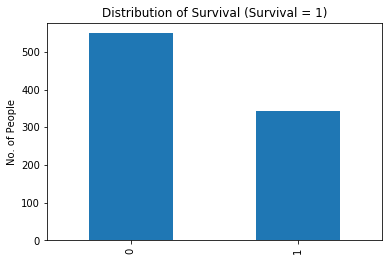

In [3]:
##Data Visualization and Exploration

import matplotlib.pyplot as plt
import seaborn as sns

train.Survived.value_counts().plot(kind= 'bar')
plt.title("Distribution of Survival (Survival = 1)")
plt.ylabel("No. of People")
plt.show()

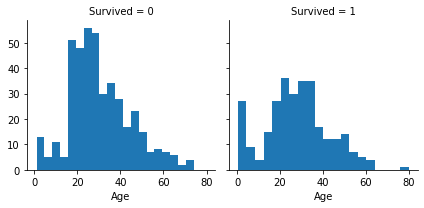

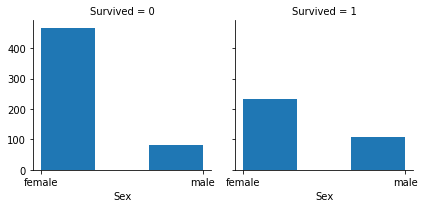

In [4]:
face_obj = sns.FacetGrid(train, col = 'Survived')
face_obj.map(plt.hist, 'Age', bins= 20)

face_obj = sns.FacetGrid(train, col = 'Survived')
face_obj.map(plt.hist, 'Sex', bins = 3)

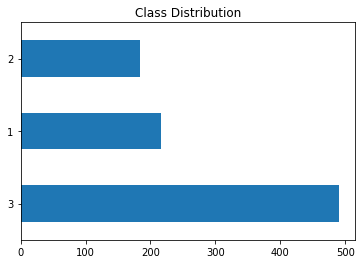

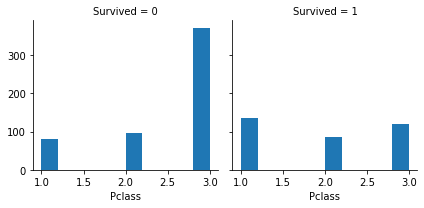

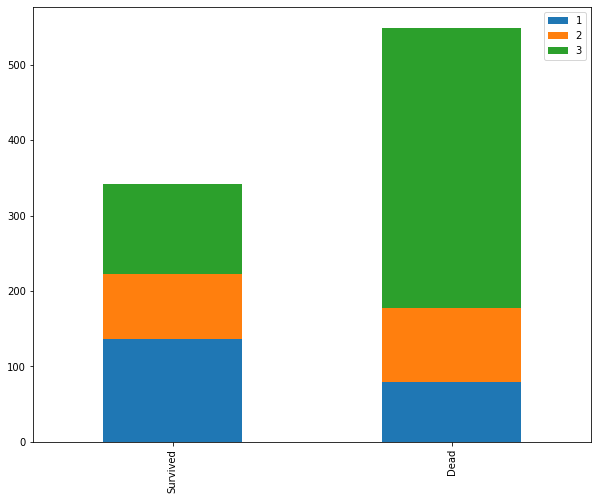

In [5]:
train.Pclass.value_counts().plot(kind = 'barh')
plt.title('Class Distribution')
plt.show()

face_obj = sns.FacetGrid(train, col = 'Survived')
face_obj.map(plt.hist, 'Pclass')

pclass_survived = train_data[train_data['Survived']==1]['Pclass'].value_counts()
pclass_dead = train_data[train_data['Survived']==0]['Pclass'].value_counts()
df = pd.DataFrame([pclass_survived,pclass_dead])
df.index = ['Survived','Dead']
df.plot(kind='bar', stacked=True, figsize=(10,8))

['S' 'C' 'Q' nan]


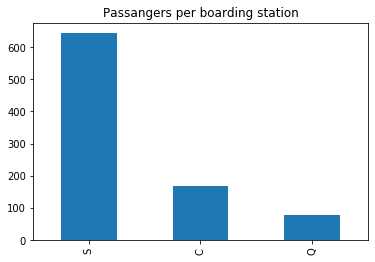

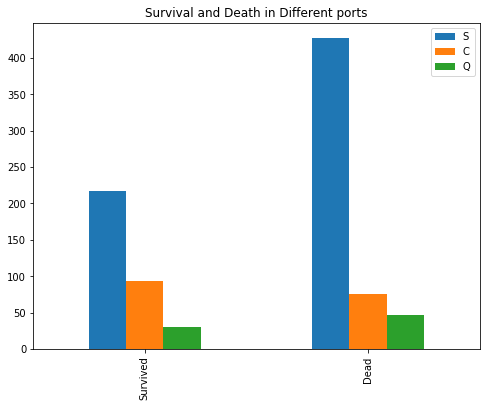

In [6]:
print(train.Embarked.unique())
train.Embarked.value_counts().plot(kind='bar')
plt.title("Passangers per boarding station")
plt.show()

survived = train[train['Survived']==1]['Embarked'].value_counts()
dead = train[train['Survived']==0]['Embarked'].value_counts()
df = pd.DataFrame([survived, dead])
df.index=['Survived','Dead']
df.plot(kind= 'bar', stacked = False, figsize = (8,6))
plt.title("Survival and Death in Different ports")
plt.show()

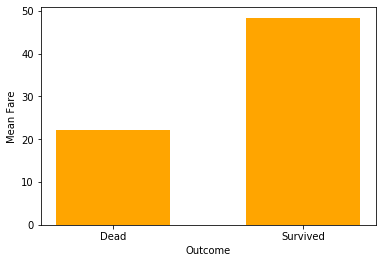

In [7]:
survived_0 = train_data[train_data['Survived'] == 0]["Fare"].mean()
survived_1 = train_data[train_data['Survived'] == 1]["Fare"].mean()
xs  = [survived_0, survived_1]
ys = ['Dead','Survived']
plt.bar(ys, xs, 0.6, align='center',color = 'orange')
plt.xlabel('Outcome')
plt.ylabel('Mean Fare')
plt.show()

In [8]:
##Data Wrangling : converting Categoricals to numericals

def wrangle(dataset):
    
    """Converting data from one form to another.
       
       It takes one argument, a dataframe (here only Titanic dataframe, if any other dataframe is selected it might thriugh an 
       error)
       
       1st we will convert Sex (whose type is "object") to a numerical data type, which will be helpful in building
       machine learning models.
       2nd we will create dummies for the Embark columns
    """
    
    dataset['Sex'] = dataset['Sex'].map({'female': 0, 'male':1}).astype(int)
    
    embarked_seperate_port = pd.get_dummies(dataset['Embarked'], prefix ='Embarked')
    dataset = pd.concat([dataset, embarked_seperate_port], axis = 1)
    
    return dataset.drop('Embarked', axis = 1)

train_converted = wrangle(train)
test_converted = wrangle(test_data)
train_converted.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


            Survived    Pclass       Sex       Age     SibSp     Parch  \
Survived    1.000000 -0.338481 -0.543351 -0.077221 -0.035322  0.081629   
Pclass     -0.338481  1.000000  0.131900 -0.369226  0.083081  0.018443   
Sex        -0.543351  0.131900  1.000000  0.093254 -0.114631 -0.245489   
Age        -0.077221 -0.369226  0.093254  1.000000 -0.308247 -0.189119   
SibSp      -0.035322  0.083081 -0.114631 -0.308247  1.000000  0.414838   
Parch       0.081629  0.018443 -0.245489 -0.189119  0.414838  1.000000   
Fare        0.257307 -0.549500 -0.182333  0.096067  0.159651  0.216225   
Embarked_C  0.168240 -0.243292 -0.082853  0.036261 -0.059528 -0.011069   
Embarked_Q  0.003650  0.221009 -0.074115 -0.022405 -0.026354 -0.081228   
Embarked_S -0.155660  0.081720  0.125722 -0.032523  0.070941  0.063036   

                Fare  Embarked_C  Embarked_Q  Embarked_S  
Survived    0.257307    0.168240    0.003650   -0.155660  
Pclass     -0.549500   -0.243292    0.221009    0.081720  
Sex     

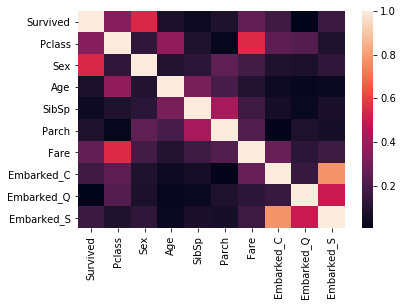

In [9]:
##Data Exploration : Correlation 

corr = train_converted.corr()
print(corr)

sns.heatmap(np.abs(corr),
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [10]:
train_converted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         714 non-null    float64
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
dtypes: float64(2), int32(1), int64(4), uint8(3)
memory usage: 48.0 KB


In [11]:
guess_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        guess_data = train_converted[(train_converted['Sex'] == i) & (train_converted['Pclass'] == j+1)]['Age'].dropna()
        age_guess = guess_data.median()
        # Convert random age float to nearest .5 age
        guess_ages[i,j] = int(age_guess/0.5 + 0.5) * 0.5
 
def wrangle_age(dataset):
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[ (dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1),'Age'] = guess_ages[i,j]
    dataset['Age'] = dataset['Age'].astype(int)
    return dataset
 
train_data = wrangle_age(train_converted)
test_data = wrangle_age(test_converted)

In [12]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1

In [13]:
print(train_data.info())
print("-" * 45)
missing = test_data['Fare'].mean()
test_data['Fare'] = test_data['Fare'].fillna(missing)
print(test_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Survived    891 non-null    int64  
 1   Pclass      891 non-null    int64  
 2   Sex         891 non-null    int32  
 3   Age         891 non-null    int32  
 4   SibSp       891 non-null    int64  
 5   Parch       891 non-null    int64  
 6   Fare        891 non-null    float64
 7   Embarked_C  891 non-null    uint8  
 8   Embarked_Q  891 non-null    uint8  
 9   Embarked_S  891 non-null    uint8  
 10  FamilySize  891 non-null    int64  
dtypes: float64(1), int32(2), int64(5), uint8(3)
memory usage: 51.5 KB
None
---------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pcla

### Machine Learning Models

In [14]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [15]:
X_train = train_data.drop("Survived", axis=1)[:800]
Y_train = train_data["Survived"][:800]
X_crossValidation = train_data.drop("Survived", axis=1)[800:]
Y_crossValidation = train_data["Survived"][800:]
X_test = test_data
X_test = X_test.drop(["Name", 'Ticket', 'Cabin'], axis =1)
X_test = X_test.drop("Fare", axis =1)

In [16]:
#Logistic Regression
model_logistic = LogisticRegression()
model_logistic.fit(X_train, Y_train)
train_accuracy = round(model_logistic.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_logistic.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predL = model_logistic.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

80.25
83.52


C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [17]:
# SVM model

svc = SVC()
svc.fit(X_train, Y_train)
train_accuracy = round(svc.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(svc.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = svc.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

68.62
68.13


In [18]:
# KNearest Neighbors

model_KNeighbor = KNeighborsClassifier()
model_KNeighbor.fit(X_train, Y_train)
train_accuracy = round(model_KNeighbor.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_KNeighbor.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = model_KNeighbor.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

79.38
78.02


In [19]:
#Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train, Y_train)
train_accuracy = round(model_rf.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model_rf.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_predS = model_rf.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

98.0
85.71


In [20]:
#submitting the results

"""submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": Y_predS
    })
submission.to_csv('submission.csv', index=False) """

'submission = pd.DataFrame({\n        "PassengerId": test_data["PassengerId"],\n        "Survived": Y_predS\n    })\nsubmission.to_csv(\'submission.csv\', index=False) '

Not workingdue to Stratified K fold, otherwise this is model selecstion technique, Hyper-parameter tuning

"""parameter_grid = {
             'max_depth' : [4, 6, 8],
             'n_estimators': [10, 50,100],
             'max_features': ['sqrt', 'auto', 'log2'],
             'min_samples_split': [0.001,0.003,0.01],
             'min_samples_leaf': [1, 3, 10],
             'bootstrap': [True,False],
             }

forest = RandomForestClassifier()

skf = StratifiedKFold(n_splits = 5)
for train_index, test_index in skf.split(X_train):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train1, X_test1 = X[train_index], X[test_index]
    y_train1, y_test1 = y[train_index], y[test_index]

grid_search = GridSearchCV(forest,
                           scoring='accuracy',
                           param_grid=parameter_grid,
                           cv=cross_validation)
 
grid_search.fit(X_train1, Y_train1)
model = grid_search
parameters = grid_search.best_params_
 
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))"""

In [21]:
parameters = {'bootstrap': False, 'min_samples_leaf': 1, 'n_estimators': 100, 
                  'min_samples_split': 0.01, 'max_features': 'log2', 'max_depth': 8}
model = RandomForestClassifier(**parameters)
    
model.fit(X_train, Y_train)
model.fit(X_train, Y_train)
train_accuracy = round(model.score(X_train, Y_train) * 100, 2)
validation_accuracy = round(model.score(X_crossValidation, Y_crossValidation) * 100, 2)
Y_pred = model.predict(X_test)
print(train_accuracy)
print(validation_accuracy)

90.5
82.42
